<div style="background: linear-gradient(to bottom, #77009f, #9f0079); border: 2px; box-radius: 20px"><h1 style="color: #220104; text-align: center"><br> Breast Cancer<br></h1></div>
<img src= 'sps.png' width=700,height=900>

<a id='toc'></a>
# Table of Content

* [Introduction](#intro)
* [Importing packages and loading data](#pac)
* [Data cleaning and data wrangling](#clean)
* [Exploratory Data Analysis (EDA)](#eda)
    * [Basic Statistical Details](#bsd)
    * [Violin plot of features by diagnosis](#vpf)
    * [Kde Plot For Each Mean Feature](#kde)
    * [Relationship Between Features](#rbf)
        * [Correlation Heatmap](#chm)
        * [Feature Pair](#fp)
        * [Positively Correlated Features](#pcf)
        * [Un-Correlated Features](#ucf)
        * [Negatively Correlated Features](#ncf)
* [Statistical Analysis(Outliers)](#sa)
    * [Box Plot](#bp)
    * [Remove Outliers Using IQR](#iqr)
* [Principal Component Analysis(PCA)](#pca)
* [Machine Learning Classification](#ml)
    * [Building Feature Set](#sp)
    * [Support Vector Machine (SVM)](#svm)
        * [Kernel Selection Using Learning Curve ](#ks)
        * [Selection of Regularization parameter(C)](#srp)
        * [Confusion Metrix and ROC Curve](#cmrc)
* [Summary of models performance](#sum)

<a id='intro'></a>
## Introduction<br>

The Breast Cancer (Wisconsin) Diagnosis dataset contains the diagnosis and a set of 30 features describing the characteristics of the cell nuclei present in the digitized image of a of a fine needle aspirate (FNA) of a breast mass.
<br><br>
Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter);
- texture (standard deviation of gray-scale values);
- perimeter;
- area;
- smoothness (local variation in radius lengths);
- compactness (perimeter^2 / area - 1.0);
- concavity (severity of concave portions of the contour);
- concave points (number of concave portions of the contour);
- symmetry;
- fractal dimension (“coastline approximation” - 1).

<br><br>
The mean, standard error (SE) and “worst” or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
<br><br>
We will analyze the features to understand the predictive value for diagnosis. We will then create models using two different algorithms and use the models to predict the diagnosis.

<a id='pac'></a>
## Importing Packages and Loading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split,ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

#import visuals.py 
import visuals as vp
import properties_1 as ps
sns.set_style('whitegrid')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from itertools import chain

In [2]:
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

<a id='data'></a>
### Load the Data

In [97]:
# Read the CSV File Using Pandas read_csv function
df = pd.read_csv('data.csv')
df.T.head(50)

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143,142,131.2,108.3,140.1,47.92
area_mean,1001,1326,1203,386.1,1297,477.1,1040,577.9,519.8,475.9,...,403.5,600.4,386,716.9,1347,1479,1261,858.1,1265,181
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0


<a id='clean'></a>
## Data cleaning and data wrangling

In [98]:
# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [99]:
#since the dataset can also contain null values
#count total rows in each column which contain null values
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [100]:
#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

0

In [101]:
#deleting useless columns
#deleting the "id" column
df.drop("id",axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id='bsd'></a>
> ### Basic Statistical Details

In [102]:
p = df.describe().T
p = p.round(4)
table = go.Table(
    columnwidth=[0.8]+[0.5]*8,
    header=dict(
        values=['Attribute'] + list(p.columns),
        line = dict(color='#506784'),
        fill = dict(color='lightblue'),
    ),
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]],
        line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 220)', '#f5f5fa'])
    )
)
py.iplot([table], filename='table-of-mining-data')

0    334
1    152
Name: diagnosis, dtype: int64


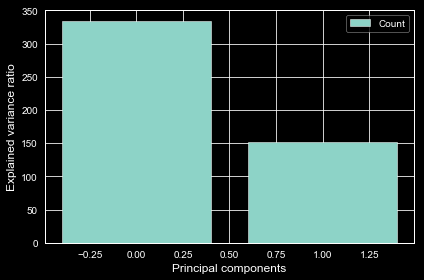

In [123]:
B, M = df['diagnosis'].value_counts()
s = [B,M]
print(df['diagnosis'].value_counts())
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar([0,1], s,align='center',
            label='Count')
    plt.ylabel('')
    plt.xlabel()
    plt.legend(loc='best')
    plt.tight_layout()

In [104]:
B, M = df['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)


trace2 = go.Pie(labels = ['Benign','Malignant'], values = df['diagnosis'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8)


py.iplot([trace2])

<a id='vpf'></a>
> ### Violin Plot of Features by Diagnosis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

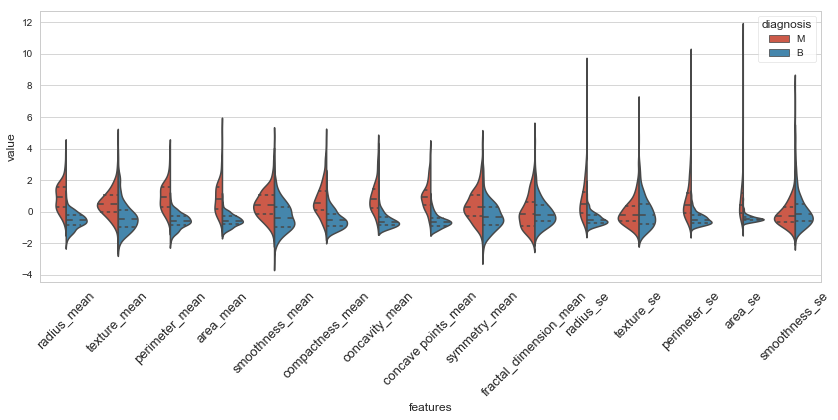

In [105]:
data_dia = df['diagnosis']
data = df.drop('diagnosis',axis=1)
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([df['diagnosis'],data_n_2.iloc[:,0:15]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(14,5))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=45,fontsize=13)

> Lets interpret the plot above together. For example, in texture_mean feature, median of the Malignant and Benign looks like separated so it can be good for classification. However, in fractal_dimension_mean feature, median of the Malignant and Benign does not looks like separated so it does not gives good information for classification

<a id='kde'></a>
> ### Kde Plot For Each Mean Feature 

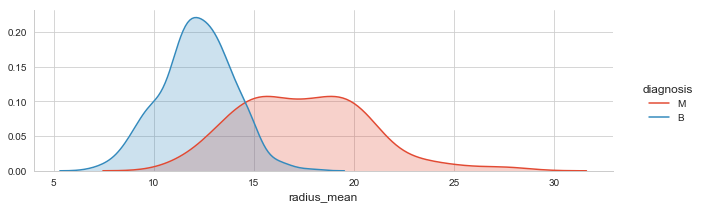

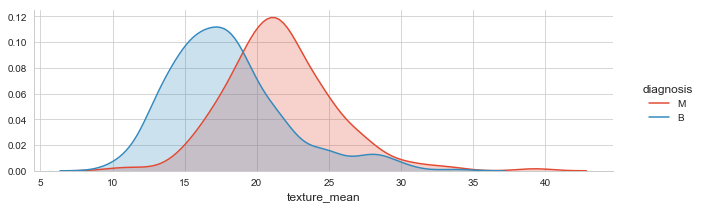

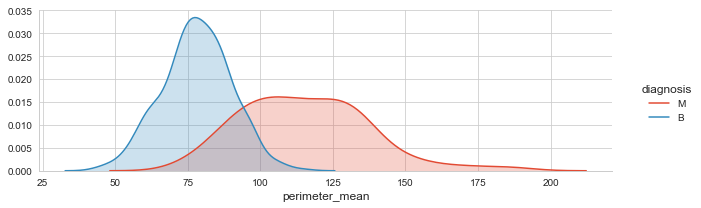

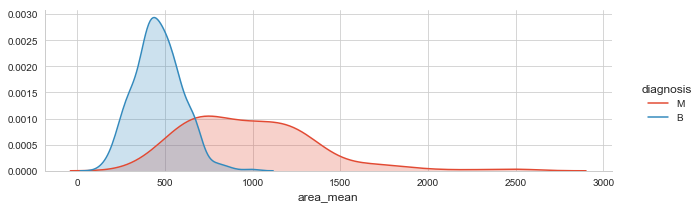

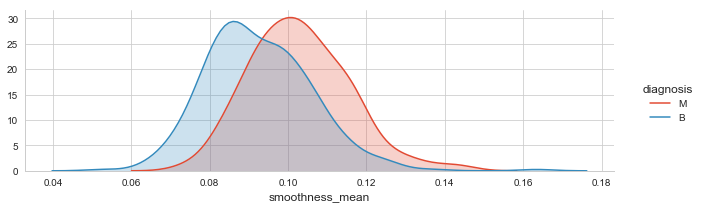

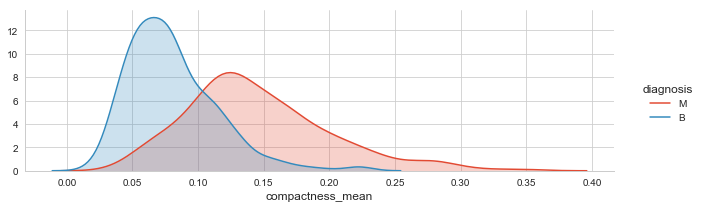

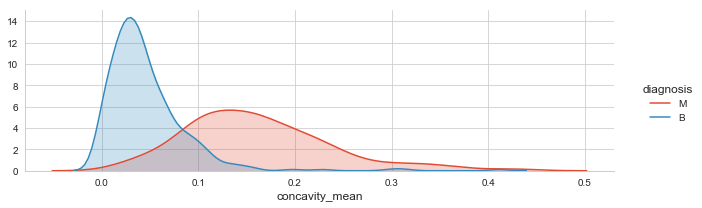

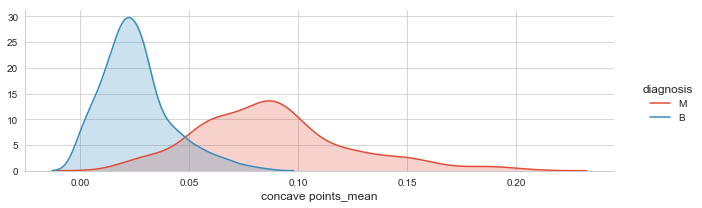

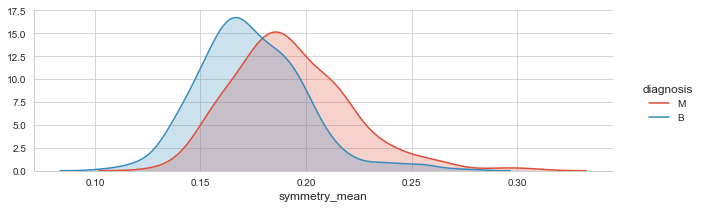

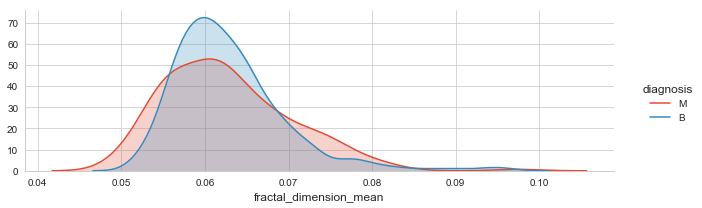

In [106]:
mean_col = [col for col in df.columns if col.endswith('_mean')]
for i in range(len(mean_col)):
    sns.FacetGrid(df,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend()
    #ax.set_title('lalala')

<a id='rbf'></a>
## Relationship Between Features  <br>
> - We can say that two variables are related with each other, if one of them gives information about others
- For example, price and distance. If you go long distance with taxi you will pay more. There fore we can say that price and distance are positively related with each other.
- Scatter Plot:  Simplest way to check relationship between two variables
- Lets look at relationship between radius mean and area mean. In scatter plot you can see that when radius mean increases, area mean also increases. Therefore, they are positively correlated with each other.
- There is no correlation between area mean and fractal dimension se. Because when area mean changes, fractal dimension se is not affected by chance of area mean

<a id='chm'></a>
> ### Correlation Heatmap

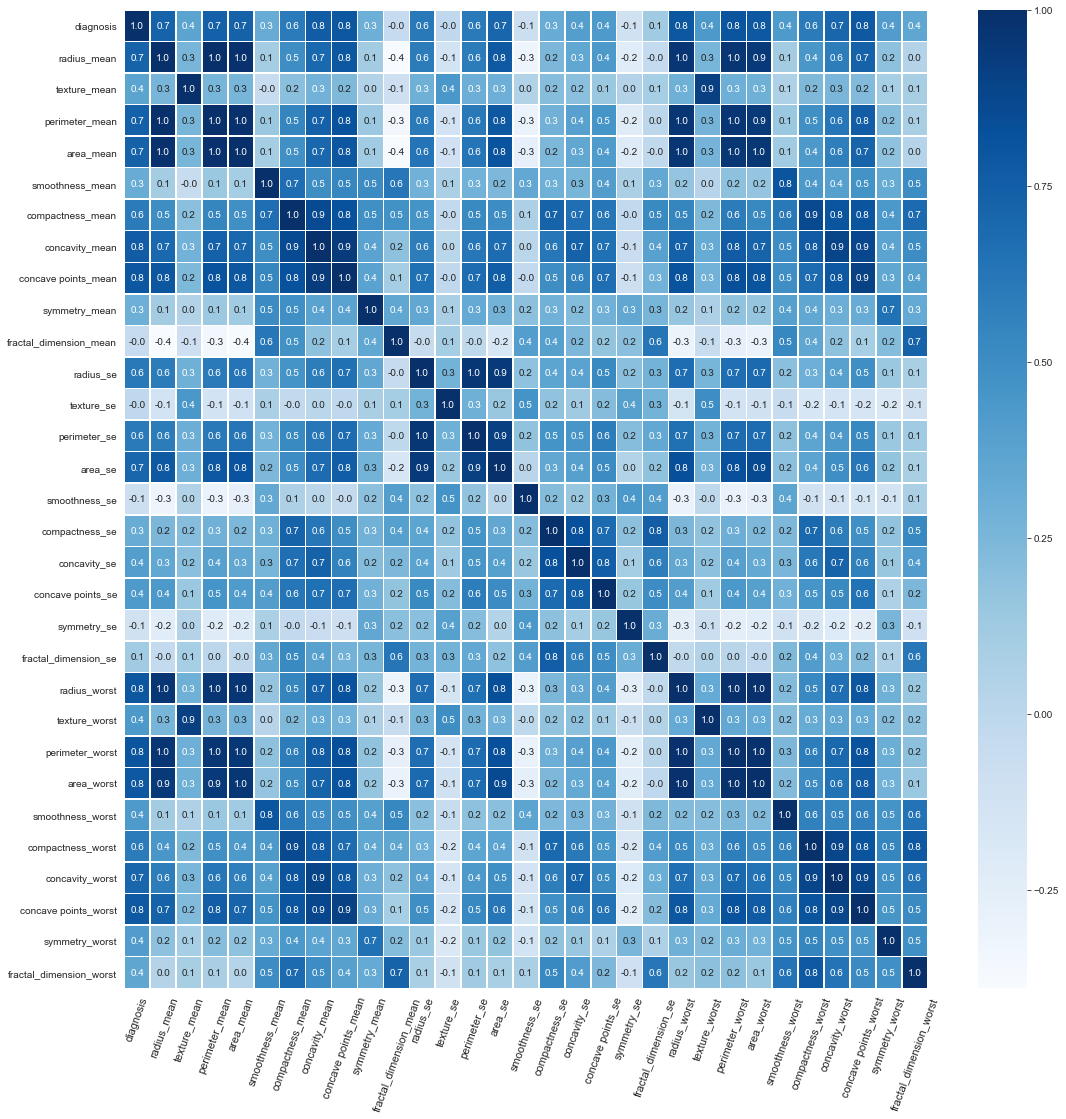

In [122]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
#cmap = sns.diverging_palette( 240 , 10 , as_cmap = True )
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.xticks(fontsize=11,rotation=70)
plt.show()

> **observation:**  <br> 
- the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
- compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
- so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean

<a id='fp'></a>
> ### Feature Pair

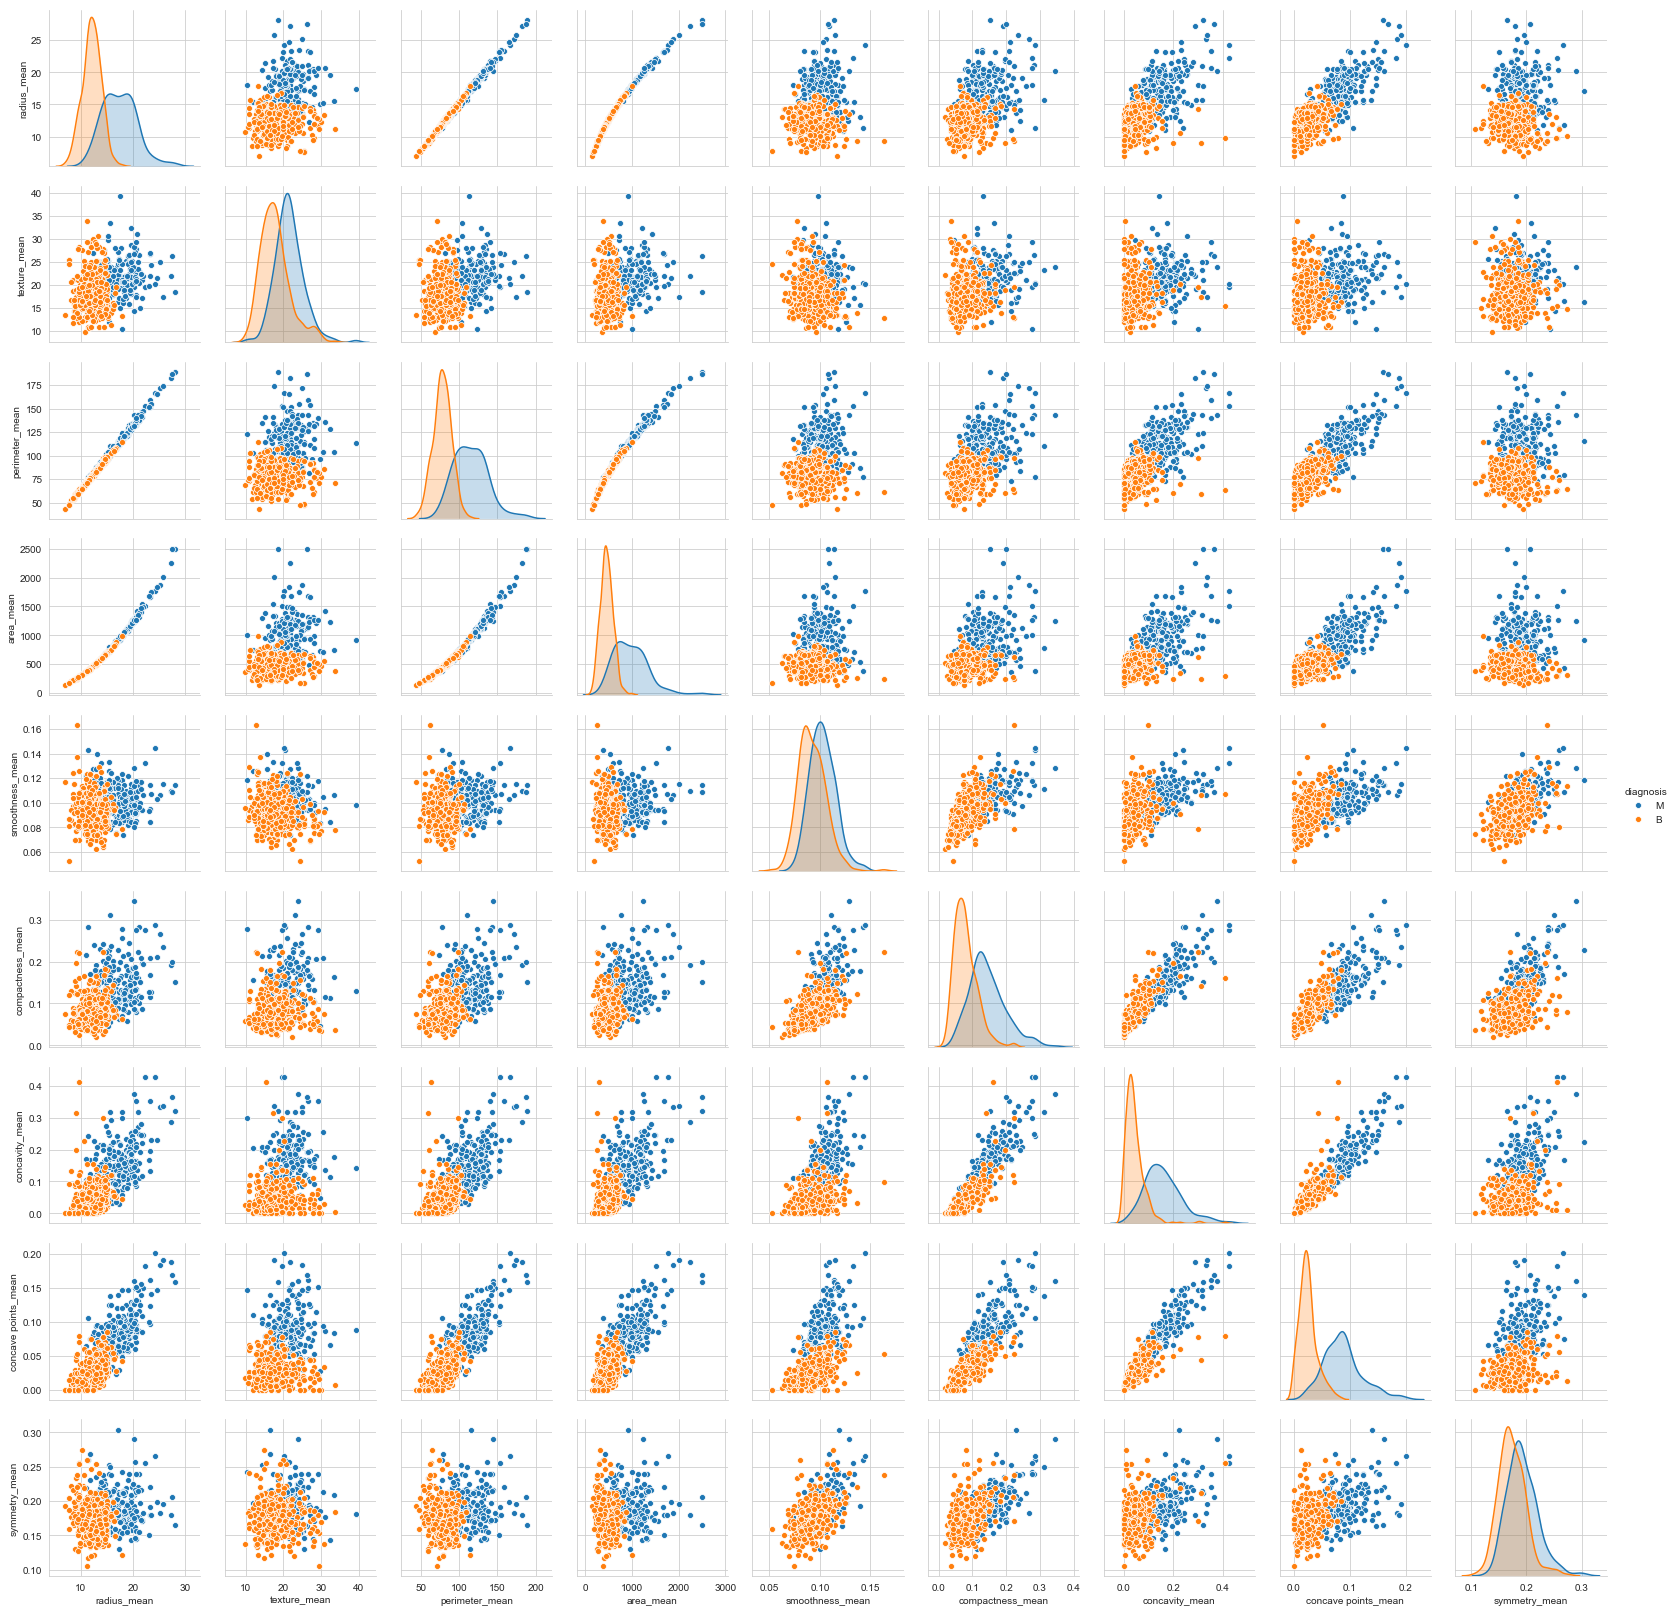

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean','diagnosis']
sns_plot = sns.pairplot(data=df[cols],hue='diagnosis')

<a id='pcf'></a>
> ### Positively Correlated Features

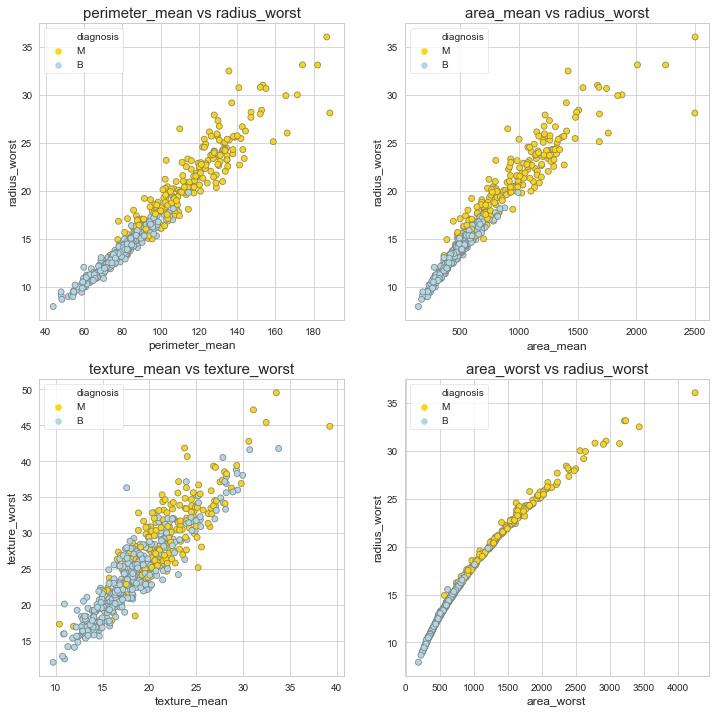

In [76]:
palette ={'B' : 'lightblue', 'M' : 'gold'}
edgecolor = 'grey'

# Plot +
fig = plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.color_palette("bright")
def plot_scatter(a,b,k):
    plt.subplot(k)
    sns.scatterplot(x = df[a], y = df[b], hue = "diagnosis",
                    data = df, palette = palette, edgecolor=edgecolor)
    plt.title(a + ' vs ' + b,fontsize=15)
    k+=1

    
plot_scatter('perimeter_mean','radius_worst',221)   
plot_scatter('area_mean','radius_worst',222)   
plot_scatter('texture_mean','texture_worst',223)   
plot_scatter('area_worst','radius_worst',224)   

<a id = 'ucf'></a>
> ### Un-Correlated Features 

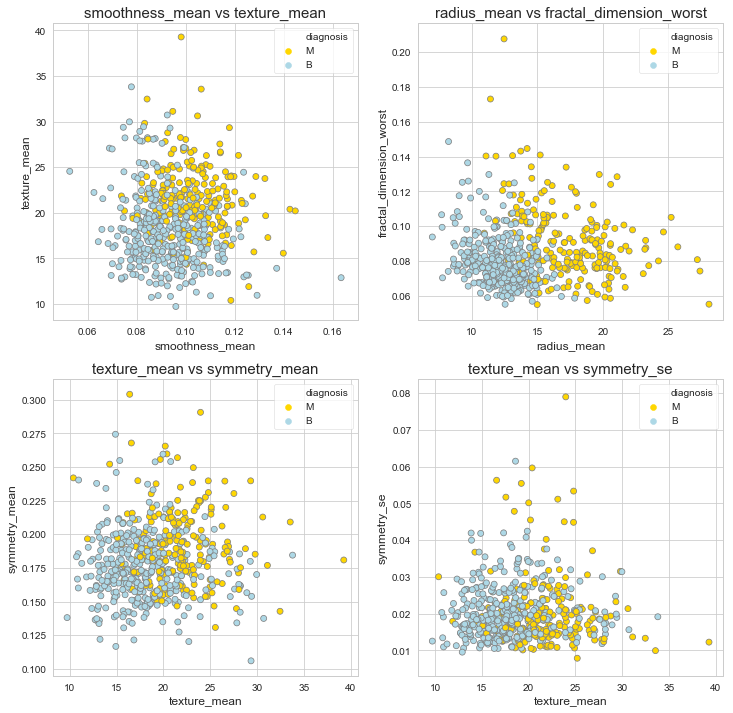

In [77]:
fig = plt.figure(figsize=(12,12))
plot_scatter('smoothness_mean','texture_mean',221)
plot_scatter('radius_mean','fractal_dimension_worst',222)
plot_scatter('texture_mean','symmetry_mean',223)
plot_scatter('texture_mean','symmetry_se',224)

<a id='ncf'></a>
> ### Negatively Correlated Features

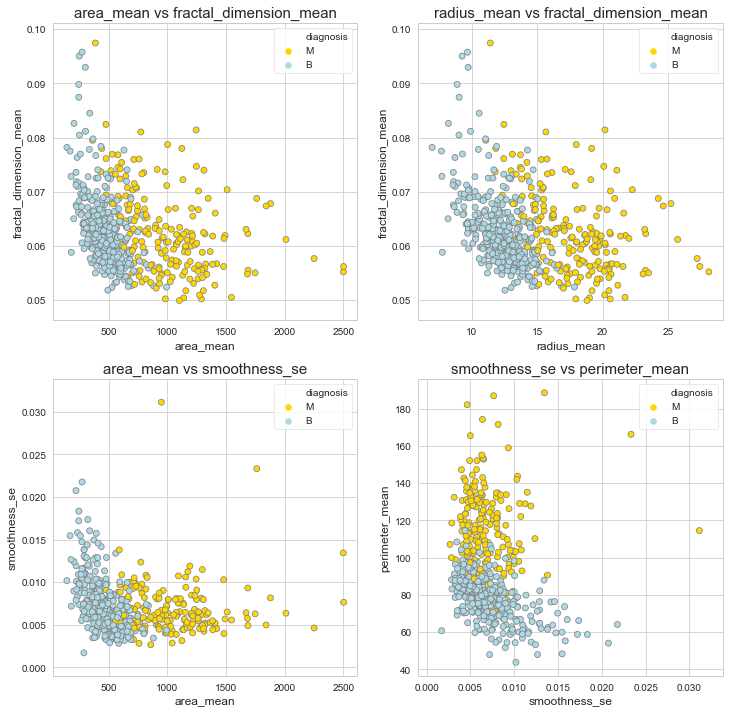

In [78]:
fig = plt.figure(figsize=(12,12))
plot_scatter('area_mean','fractal_dimension_mean',221)
plot_scatter('radius_mean','fractal_dimension_mean',222)
plot_scatter('area_mean','smoothness_se',223)
plot_scatter('smoothness_se','perimeter_mean',224)

<a id='sa'></a>

## Statistical Analysis(Outliers Detection) <br>

> While looking histogram as yok can see there are rare values in bening distribution (green in graph) <br>
There values can be errors or rare events.   <br>
These errors and rare events can be called outliers.  <br>
Calculating outliers:   
- first we need to calculate first quartile (Q1)(25%)  <br>
- then find IQR(inter quartile range) = Q3-Q1  <br>
- finally compute Q1 - 1.5IQR and Q3 + 1.5IQR   <br>
- Anything outside this range is an outlier   <br>

<a id='bp'></a>
> ### Box Plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

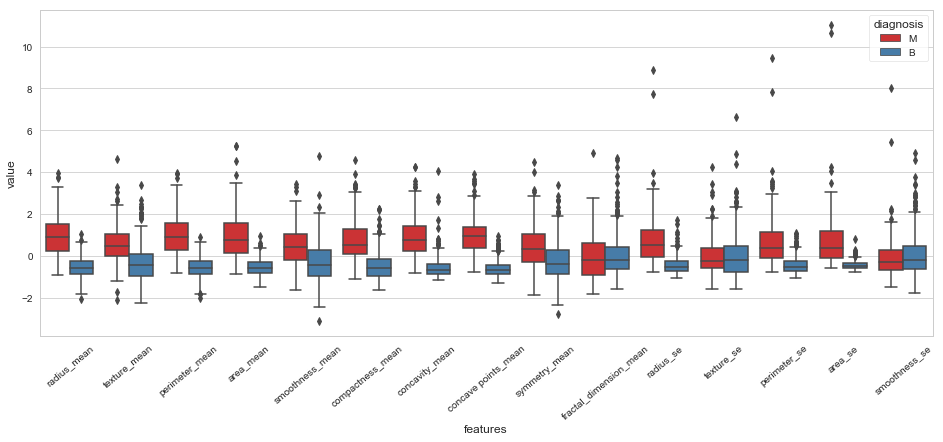

In [79]:
plt.style.use('ggplot')
sns.set_style('whitegrid')
plt.figure(figsize=(16,6))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data,palette='Set1')
plt.xticks(rotation=40)

<a id='iqr'></a>
> ### Remove Outliers Using IQR

In [107]:
from collections import Counter

def detect_outliers(train_data,n,features):
    outlier_indices = []
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(train_data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(train_data[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = train_data[(train_data[col] < Q1 - outlier_step) | (train_data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
list_atributes = df.drop('diagnosis',axis=1).columns
Outliers_to_drop = detect_outliers(df,2,list_atributes)

In [108]:
df.loc[Outliers_to_drop]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
82,M,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,...,30.000,33.62,211.70,2562.0,0.15730,0.60760,0.64760,0.28670,0.2355,0.10510
108,M,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.400,28.01,206.80,2360.0,0.17010,0.69970,0.96080,0.29100,0.4055,0.09789
122,M,24.250,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.020,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
164,M,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.09702,0.1801,...,28.010,28.22,184.20,2403.0,0.12280,0.35830,0.39480,0.23460,0.3589,0.09187
180,M,27.220,21.87,182.10,2250.0,0.10940,0.19140,0.28710,0.18780,0.1800,...,33.120,32.85,220.80,3216.0,0.14720,0.40340,0.53400,0.26880,0.2856,0.08082
202,M,23.290,26.67,158.90,1685.0,0.11410,0.20840,0.35230,0.16200,0.2200,...,25.120,32.68,177.00,1986.0,0.15360,0.41670,0.78920,0.27330,0.3198,0.08762
212,M,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,...,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525
236,M,23.210,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,...,31.010,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677
339,M,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.23080,0.14100,0.1797,...,30.670,30.73,202.40,2906.0,0.15150,0.26780,0.48190,0.20890,0.2593,0.07738
352,M,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.19130,0.1956,...,33.130,23.58,229.30,3234.0,0.15300,0.59370,0.64510,0.27560,0.3690,0.08815


In [109]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [110]:
df.shape

(486, 31)

<a id='pca'></a>
## Principal Component Analysis(PCA)

In [111]:
group_map = {"M": 1, "B": 0}

df['diagnosis'] = df['diagnosis'].map(group_map)

In [112]:
target_pca = pd.DataFrame(df['diagnosis'])
data_pca = df.drop('diagnosis', axis=1)

#To make a PCA, normalize data is essential
X_pca = data_pca.values
X_std = StandardScaler().fit_transform(X_pca)

pca = PCA(svd_solver='full')
pca_std = pca.fit(X_std, target_pca).transform(X_std)

pca_std = pd.DataFrame(pca_std)
pca_std = pca_std.merge(target_pca, left_index = True, right_index = True, how = 'left')

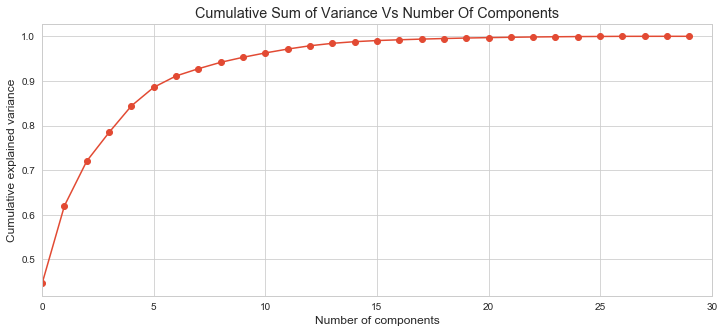

In [113]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlim(0,30,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative Sum of Variance Vs Number Of Components')
plt.show()

In [114]:
var_pca = pd.DataFrame(pca.explained_variance_ratio_)
labels = []
for i in range(1,31):
    labels.append('Col_'+str(i))
trace = go.Pie(labels = labels, values = var_pca[0].values, opacity = 0.8,
               textfont=dict(size=15))
layout = dict(title =  'PCA : components and explained variance')
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [124]:
pca.explained_variance_ratio_

array([4.46380247e-01, 1.73921362e-01, 1.00118724e-01, 6.42590674e-02,
       5.94288560e-02, 4.15840738e-02, 2.54594333e-02, 1.62203187e-02,
       1.43275858e-02, 1.12520663e-02, 9.80155599e-03, 8.63553161e-03,
       7.40950929e-03, 5.45161332e-03, 3.70277887e-03, 2.54032992e-03,
       1.71613424e-03, 1.51916114e-03, 1.30269213e-03, 1.11344975e-03,
       9.03492816e-04, 7.68698470e-04, 6.88546885e-04, 4.77091393e-04,
       4.07666896e-04, 2.85008652e-04, 2.48131245e-04, 5.26691004e-05,
       2.05729397e-05, 3.63227443e-06])

<a id='ml'></a>
## Machine Learning Classification

<a id='sp'></a>
> ### Building Feature Set<br>
-  Preparing data for model building and checking. 30 percent of data is kept aside for validation purposes. We will also be performing scaling of data using sklearn's MinMaxScaler.

In [125]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#X = pd.DataFrame(preprocessing.scale(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<a id='svm'></a>
> ### Support Vector Machine(SVM)

In [126]:
from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Benign','Malignant']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, _ = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")

On linear kernel:


Confusion Matrix:
[[94  1]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.94      0.96        51

   micro avg       0.97      0.97      0.97       146
   macro avg       0.97      0.97      0.97       146
weighted avg       0.97      0.97      0.97       146



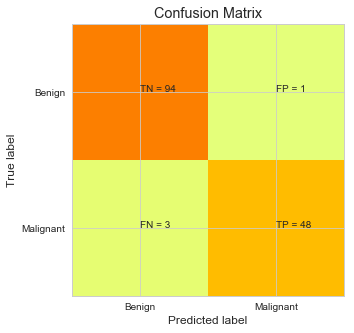

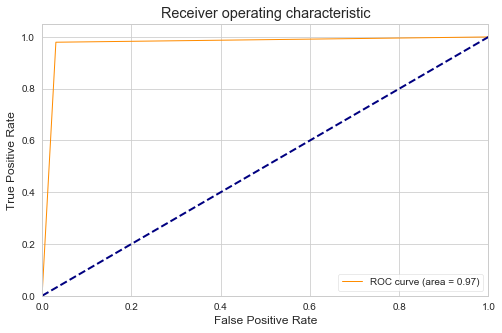


Acuuracy Of the Model:  0.9726027397260274 


On rbf kernel:


Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

   micro avg       0.98      0.98      0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



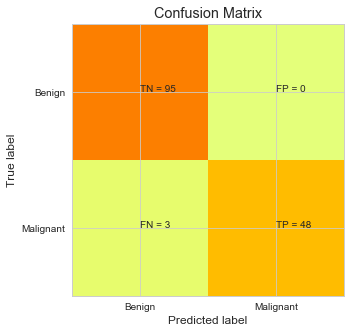

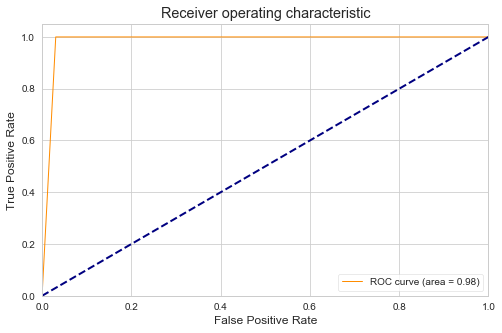


Acuuracy Of the Model:  0.9794520547945206 




In [118]:
for i in ['linear','rbf']:
    clf = SVC(kernel=i)
    clf.fit(X_train,y_train)
    print("On "+ i + " kernel:" )
    report_performance(clf)
    roc_curves(clf)
    accuracy(clf)

<a id='ks'></a>
> #### Kernel Selection Using Learning Curve

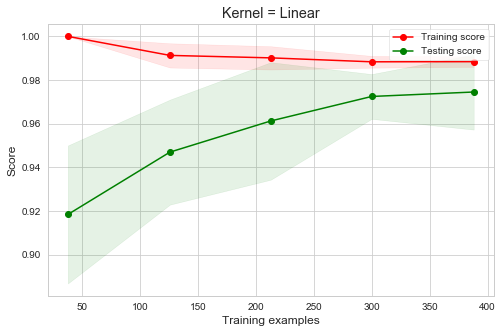

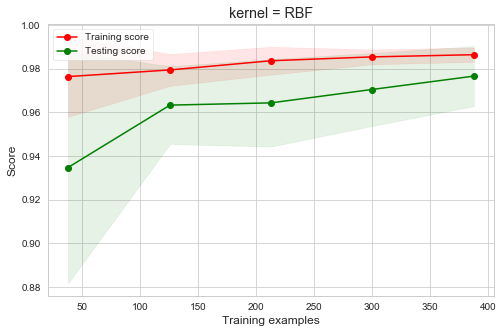

In [119]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(kernel='linear')
vp.plot_learning_curve(estimator, 'Kernel = Linear', X, y, cv=cv)
estimator = SVC(kernel='rbf')
vp.plot_learning_curve(estimator, 'kernel = RBF', X, y, cv=cv)

> ### Bias-Variance Tradeoff
> - High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff
> - **On RBF Kernel: High Variance**
> - There is a substantial gap between the training and testing scores.
-  The training Accuracy is close to 1 while the testing accuracy is comparitively lower (closer to 0.7). This indicates overfitting of data.
- This indicates the model is fitting the dataset well but not generalizing well hence the model is suffering from high variance(Overfitting).

<a id='srp'></a>
> #### Selection of Regularization parameter(C)
> - C is a regularization parameter that controls the trade off between the achieving a low training error and a low testing error that is the ability to generalize your classifier to unseen data. Consider the objective function of a linear SVM 

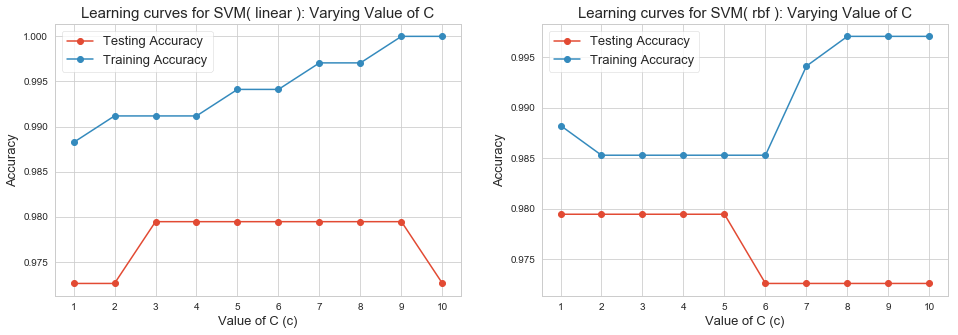

In [120]:
fig = plt.figure(figsize=(16,5))
def plotlc(kernel=None,k=0):
    plt.subplot(k)
    cp = np.arange(1, 11)
    train_accuracy = np.empty(len(cp))
    test_accuracy = np.empty(len(cp))
    for i, c in enumerate(cp):
        clf = SVC(C=c,kernel = kernel)
        clf.fit(X_train, y_train)
        train_accuracy[i] = clf.score(X_train, y_train)
        test_accuracy[i] = clf.score(X_test, y_test)

        #plt.figure(figsize=(10,5))
    plt.title('Learning curves for SVM( '+ kernel+' ): Varying Value of C', size=15)
    plt.plot(cp, test_accuracy, marker ='o', label = 'Testing Accuracy')
    plt.plot(cp, train_accuracy, marker ='o', label = 'Training Accuracy')
    plt.legend(prop={'size':13})
    plt.xlabel('Value of C (c)', size=13)
    plt.ylabel('Accuracy', size=13)
    plt.xticks(cp);
#plt.show()

plotlc('linear',121)
plotlc('rbf',122)

> #### Optimal Model



Confusion Matrix:
[[95  0]
 [ 3 48]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        95
           1       1.00      0.94      0.97        51

   micro avg       0.98      0.98      0.98       146
   macro avg       0.98      0.97      0.98       146
weighted avg       0.98      0.98      0.98       146



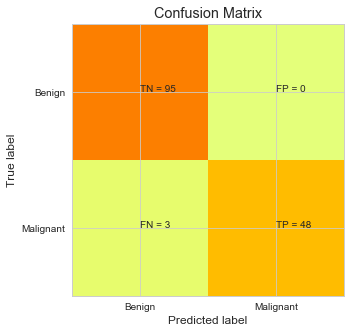

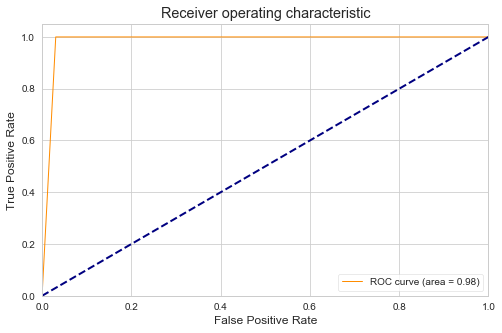


Acuuracy Of the Model:  0.9794520547945206 




In [121]:
clf = SVC(kernel='rbf',C=1)
clf.fit(X_train,y_train)
report_performance(clf)
roc_curves(clf)
accuracy(clf)

<center><span>&#8226;</span>&nbsp; &nbsp;<a href='https://www.github.com/deepak525'>Github</a>&nbsp; &nbsp;&nbsp; &nbsp;<span>&#8226;</span>&nbsp; &nbsp;<a href='https://www.kaggle.com/deepak525'>Kaggle</a>&nbsp; &nbsp;&nbsp; &nbsp;<span>&#8226;</span>&nbsp; &nbsp;<a href='https://www.linkedin.com/in/deepak525/'>Linkdin</a><center>